In [3]:
# %load scigrid-lopf-then-pf.py
## LOPF then non-linear power flow with SciGRID
#
#This Jupyter Notebook is also available to download at: <http://www.pypsa.org/examples/scigrid-lopf-then-pf.ipynb> and can be viewed as an HTML page at: <http://pypsa.org/examples/scigrid-lopf-then-pf.html>.
#
#In this example, the dispatch of generators is optimised using the linear OPF, then a non-linear power flow is run on the resulting dispatch.
#
#The data files for this example are in the examples folder of the github repository: <https://github.com/FRESNA/PyPSA>.
#
### Data sources
#
#The data is generated in a separate notebook at <http://www.pypsa.org/examples/add_load_gen_trafos_to_scigrid.ipynb>.
#
#
#Grid: based on [SciGRID](http://scigrid.de/) Version 0.2 which is based on [OpenStreetMap](http://www.openstreetmap.org/).
#
#Load size and location: based on Landkreise (NUTS 3) GDP and population.
#
#Load time series: from ENTSO-E hourly data, scaled up uniformly by factor 1.12 (a simplification of the methodology in Schumacher, Hirth (2015)).
#
#Conventional power plant capacities and locations: BNetzA list.
#
#Wind and solar capacities and locations: EEG Stammdaten, based on  http://www.energymap.info/download.html, which represents capacities at the end of 2014. Units without PLZ are removed.
#
#Wind and solar time series: REatlas, Andresen et al, "Validation of Danish wind time series from a new global renewable energy atlas for energy system analysis," Energy 93 (2015) 1074 - 1088.
#
#NB:
#
#All times in the dataset are UTC.
#
#Where SciGRID nodes have been split into 220kV and 380kV substations, all load and generation is attached to the 220kV substation.
#
### Warning
#
#This dataset is ONLY intended to demonstrate the capabilities of PyPSA and is NOT (yet) accurate enough to be used for research purposes.
#
#Known problems include:
#
#i) Rough approximations have been made for missing grid data, e.g. 220kV-380kV transformers and connections between close sub-stations missing from OSM.
#
#ii) There appears to be some unexpected congestion in parts of the network, which may mean for example that the load attachment method (by Voronoi cell overlap with Landkreise) isn't working, particularly in regions with a high density of substations.
#
#iii) Attaching power plants to the nearest high voltage substation may not reflect reality.
#
#iv) There is no proper n-1 security in the calculations - this can either be simulated with a blanket e.g. 70% reduction in thermal limits (as done here) or a proper security constrained OPF (see e.g.  <http://www.pypsa.org/examples/scigrid-sclopf.ipynb>).
#
#v) The borders and neighbouring countries are not represented.
#
#vi) Hydroelectric power stations are not modelled accurately.
#
#viii) The marginal costs are illustrative, not accurate.
#
#ix) Only the first day of 2011 is in the github dataset, which is not representative. The full year of 2011 can be downloaded at <http://www.pypsa.org/examples/scigrid-with-load-gen-trafos-2011.zip>.
#
#x) The ENTSO-E total load for Germany may not be scaled correctly; it is scaled up uniformly by factor 1.12 (a simplification of the methodology in Schumacher, Hirth (2015), which suggests monthly factors).
#
#xi) Biomass from the EEG Stammdaten are not read in at the moment.
#
#xii) Power plant start up costs, ramping limits/costs, minimum loading rates are not considered.

#make the code as Python 3 compatible as possible
from __future__ import print_function, division, absolute_import

import pypsa

import numpy as np

import pandas as pd

import os

import matplotlib.pyplot as plt

In [1]:
%matplotlib inline

#You may have to adjust this path to where
#you downloaded the github repository
#https://github.com/FRESNA/PyPSA

csv_folder_name = "scigrid-with-load-gen-trafos/"

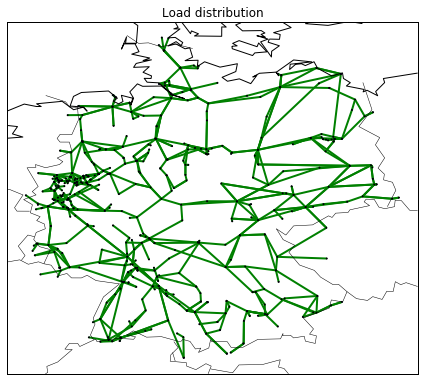

In [4]:
network = pypsa.Network(csv_folder_name=csv_folder_name)

### Plot the distribution of the load and of generating tech

fig,ax = plt.subplots(1,1)

fig.set_size_inches(6,6)

load_distribution = network.loads_t.p_set.loc[network.snapshots[0]].groupby(network.loads.bus).sum()

network.plot(bus_sizes=1,ax=ax,title="Load distribution")

fig.tight_layout()
#fig.savefig('load-distribution.png')

In [5]:
print(1. / (1.j * network.branches()["x"] + network.branches()["r"]))

             name
Transformer  2                                  -10j
             5                                  -10j
             10                                 -10j
             12                                 -10j
             13                                 -10j
             15                                 -10j
             18                                 -10j
             20                                 -10j
             22                                 -10j
             24                                 -10j
             26                                 -10j
             30                                 -10j
             32                                 -10j
             37                                 -10j
             42                                 -10j
             46                                 -10j
             52                                 -10j
             56                                 -10j
             61             

Performing linear OPF for one day, 4 snapshots at a time:
Solver log file: '/tmp/tmpxOZiOH.glpk.log'
Solver solution file: '/tmp/tmpJuZmZB.glpk.raw'
Solver problem files: ('/tmp/tmp4hVR30.pyomo.lp',)
Solver log file: '/tmp/tmpLQx6gj.glpk.log'
Solver solution file: '/tmp/tmpjkrYan.glpk.raw'
Solver problem files: ('/tmp/tmpsskc4G.pyomo.lp',)
Solver log file: '/tmp/tmpQgxi4q.glpk.log'
Solver solution file: '/tmp/tmpxpqc54.glpk.raw'
Solver problem files: ('/tmp/tmp867GuP.pyomo.lp',)
Solver log file: '/tmp/tmp641sip.glpk.log'
Solver solution file: '/tmp/tmpdfzRvD.glpk.raw'
Solver problem files: ('/tmp/tmpQKi7m4.pyomo.lp',)
Solver log file: '/tmp/tmpGgdnGC.glpk.log'
Solver solution file: '/tmp/tmpc5i7J_.glpk.raw'
Solver problem files: ('/tmp/tmpSoPfYV.pyomo.lp',)
Solver log file: '/tmp/tmpOXlci3.glpk.log'
Solver solution file: '/tmp/tmpDNmWLY.glpk.raw'
Solver problem files: ('/tmp/tmpDfeDjG.pyomo.lp',)


/home/paul/anaconda2/lib/python2.7/site-packages/pandas/tools/plotting.py:965: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"


With the linear load flow, there is the following per unit loading:
count    852.000000
mean      -0.006771
std        0.370538
min       -1.000000
25%       -0.187330
50%        0.004029
75%        0.175532
max        1.000000
dtype: float64
Performing non-linear PF on results of LOPF:
With the non-linear load flow, there is the following per unit loading
of the full thermal rating:
count    852.000000
mean      -0.004915
std        0.268929
min       -0.764279
25%       -0.133064
50%        0.003630
75%        0.134764
max        0.840852
dtype: float64
The voltage angle differences across the lines have (in degrees):
count    852.000000
mean      -0.063549
std        2.551611
min      -11.423377
25%       -0.518536
50%        0.000725
75%        0.586725
max       19.824162
dtype: float64


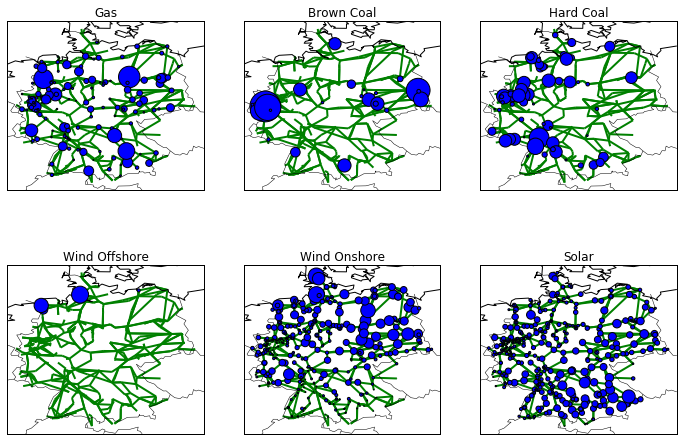

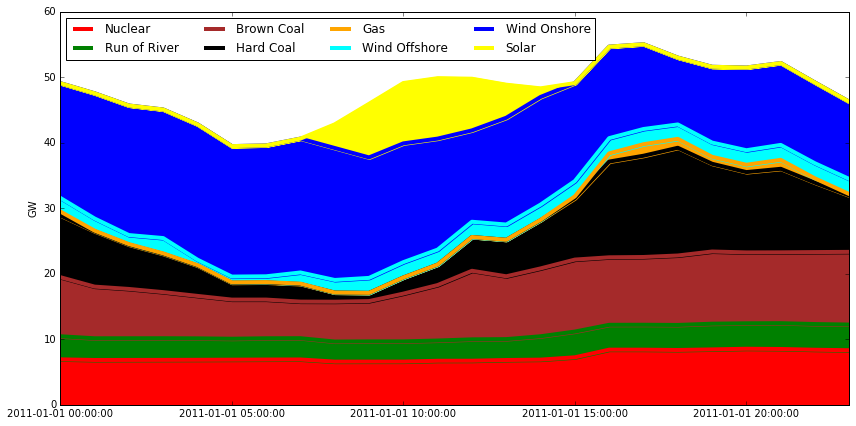

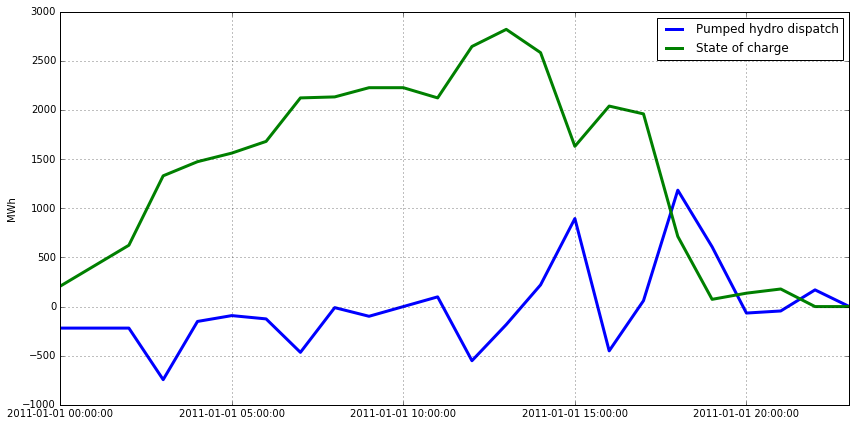

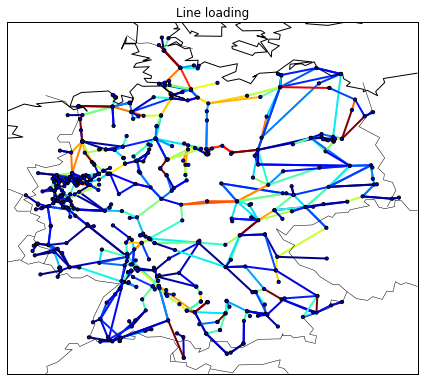

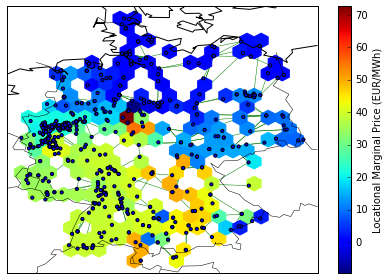

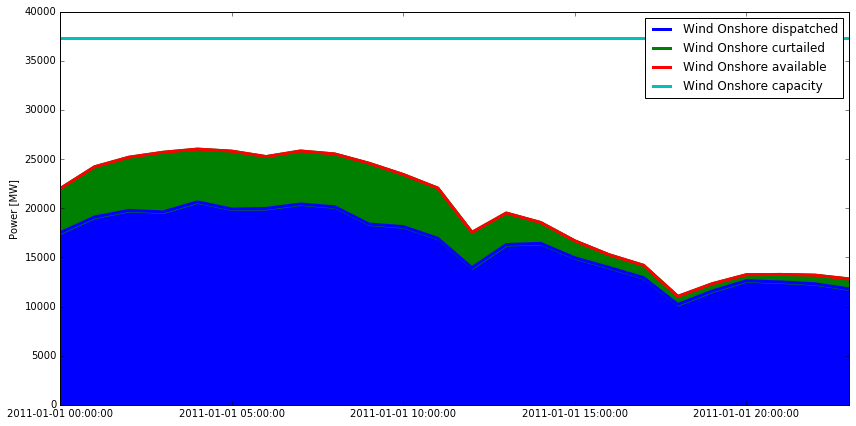

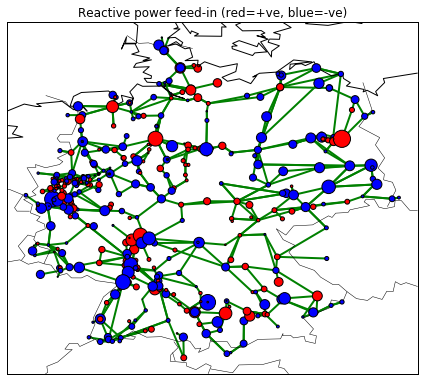

In [9]:
network.generators.groupby("carrier")["p_nom"].sum()

network.storage_units.groupby("carrier")["p_nom"].sum()

techs = ["Gas","Brown Coal","Hard Coal","Wind Offshore","Wind Onshore","Solar"]

n_graphs = len(techs)

n_cols = 3

if n_graphs % n_cols == 0:
    n_rows = n_graphs // n_cols
else:
    n_rows = n_graphs // n_cols + 1


fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols)

size = 4

fig.set_size_inches(size*n_cols,size*n_rows)

for i,tech in enumerate(techs):
    i_row = i // n_cols
    i_col = i % n_cols

    ax = axes[i_row,i_col]

    gens = network.generators[network.generators.carrier == tech]

    gen_distribution = gens.groupby("bus").sum()["p_nom"].reindex(network.buses.index,fill_value=0.)

    network.plot(ax=ax,bus_sizes=0.2*gen_distribution)

    ax.set_title(tech)



### Run Linear Optimal Power Flow on the first day of 2011

#to approximate n-1 security and allow room for reactive power flows,
#don't allow any line to be loaded above 70% of their thermal rating

contingency_factor = 0.7

network.lines.s_nom = contingency_factor*network.lines.s_nom

#There are some infeasibilities without small extensions
for line_name in ["316","527","602"]:
    network.lines.loc[line_name,"s_nom"] = 1200


#the lines to extend to resolve infeasibilities can
#be found by
#uncommenting the lines below to allow the network to be extended

#network.lines["s_nom_original"] = network.lines.s_nom

#network.lines.s_nom_extendable = True
#network.lines.s_nom_min = network.lines.s_nom

#Assume 450 EUR/MVA/km
#network.lines.capital_cost = 450*network.lines.length

network.now = network.snapshots[0]

group_size = 4

solver_name = "glpk"

print("Performing linear OPF for one day, {} snapshots at a time:".format(group_size))

network.storage_units.state_of_charge_initial = 0.

for i in range(int(24/group_size)):
    #set the initial state of charge based on previous round
    if i>0:
        network.storage_units.state_of_charge_initial = network.storage_units_t.state_of_charge.loc[network.snapshots[group_size*i-1]]
    network.lopf(network.snapshots[group_size*i:group_size*i+group_size],
                 solver_name=solver_name,
                 keep_files=True)
    network.lines.s_nom = network.lines.s_nom_opt

#if lines are extended, look at which ones are bigger
#network.lines[["s_nom_original","s_nom"]][abs(network.lines.s_nom - contingency_factor*network.lines.s_nom_original) > 1]

p_by_carrier = network.generators_t.p.groupby(network.generators.carrier, axis=1).sum()

p_by_carrier.drop((p_by_carrier.max()[p_by_carrier.max() < 1700.]).index,axis=1,inplace=True)

p_by_carrier.columns

colors = {"Brown Coal" : "brown",
          "Hard Coal" : "k",
          "Nuclear" : "r",
          "Run of River" : "green",
          "Wind Onshore" : "blue",
          "Solar" : "yellow",
          "Wind Offshore" : "cyan",
          "Waste" : "orange",
          "Gas" : "orange"}
#reorder
cols = ["Nuclear","Run of River","Brown Coal","Hard Coal","Gas","Wind Offshore","Wind Onshore","Solar"]
p_by_carrier = p_by_carrier[cols]

fig,ax = plt.subplots(1,1)

fig.set_size_inches(12,6)

(p_by_carrier/1e3).plot(kind="area",ax=ax,linewidth=4,colors=[colors[col] for col in p_by_carrier.columns])


ax.legend(ncol=4,loc="upper left")

ax.set_ylabel("GW")

ax.set_xlabel("")

fig.tight_layout()
#fig.savefig("stacked-gen.png")

fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,6)

p_storage = network.storage_units_t.p.sum(axis=1)
state_of_charge = network.storage_units_t.state_of_charge.sum(axis=1)
p_storage.plot(label="Pumped hydro dispatch",ax=ax,linewidth=3)
state_of_charge.plot(label="State of charge",ax=ax,linewidth=3)

ax.legend()
ax.grid()
ax.set_ylabel("MWh")
ax.set_xlabel("")

fig.tight_layout()
#fig.savefig("storage-scigrid.png")

print("With the linear load flow, there is the following per unit loading:")
loading = network.lines_t.p0.loc[network.snapshots[4]]/network.lines.s_nom
print(loading.describe())

fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,6)

network.plot(ax=ax,line_colors=abs(loading),line_cmap=plt.cm.jet,title="Line loading")

fig.tight_layout()
#fig.savefig("line-loading.png")

network.buses_t.marginal_price.loc[network.now].describe()

fig,ax = plt.subplots(1,1)
fig.set_size_inches(6,4)


network.plot(ax=ax,line_widths=pd.Series(0.5,network.lines.index))
plt.hexbin(network.buses.x, network.buses.y,
           gridsize=20,
           C=network.buses_t.marginal_price.loc[network.now],
           cmap=plt.cm.jet)

#for some reason the colorbar only works with graphs plt.plot
#and must be attached plt.colorbar

cb = plt.colorbar()
cb.set_label('Locational Marginal Price (EUR/MWh)')

fig.tight_layout()
#fig.savefig('lmp.png')

### Look at variable curtailment

carrier = "Wind Onshore"

capacity = network.generators.groupby("carrier").sum().at[carrier,"p_nom"]

p_available = network.generators_t.p_max_pu.multiply(network.generators["p_nom"])

p_available_by_carrier =p_available.groupby(network.generators.carrier, axis=1).sum()

p_curtailed_by_carrier = p_available_by_carrier - p_by_carrier

p_df = pd.DataFrame({carrier + " available" : p_available_by_carrier[carrier],
                     carrier + " dispatched" : p_by_carrier[carrier],
                     carrier + " curtailed" : p_curtailed_by_carrier[carrier]})

p_df[carrier + " capacity"] = capacity

p_df["Wind Onshore curtailed"][p_df["Wind Onshore curtailed"] < 0.] = 0.

fig,ax = plt.subplots(1,1)
fig.set_size_inches(12,6)
p_df[[carrier + " dispatched",carrier + " curtailed"]].plot(kind="area",ax=ax,linewidth=3)
p_df[[carrier + " available",carrier + " capacity"]].plot(ax=ax,linewidth=3)

ax.set_xlabel("")
ax.set_ylabel("Power [MW]")
ax.set_ylim([0,40000])
ax.legend()

fig.tight_layout()
#fig.savefig("scigrid-curtailment.png")

## Check power flow

for bus in network.buses.index:
    bus_sum = network.buses_t.p.loc[network.now,bus]
    branches_sum = 0
    for comp in ["lines","transformers"]:
        comps = getattr(network,comp)
        comps_t = getattr(network,comp+"_t")
        branches_sum += comps_t.p0.loc[network.now,comps.bus0==bus].sum() - comps_t.p0.loc[network.now,comps.bus1==bus].sum()

    if abs(bus_sum-branches_sum) > 1e-4:
        print(bus,bus_sum,branches_sum)

### Now perform a full Newton-Raphson power flow on the first hour

#For the PF, set the P to the optimised P
network.generators_t.p_set = network.generators_t.p_set.reindex(columns=network.generators.index)
network.generators_t.p_set.loc[network.now] = network.generators_t.p.loc[network.now]


#set all buses to PV, since we don't know what Q set points are
network.generators.control = "PV"

#set slack
#network.generators.loc["1 Coal","control"] = "Slack"


#Need some PQ buses so that Jacobian doesn't break
f = network.generators[network.generators.bus == "492"]
network.generators.loc[f.index,"control"] = "PQ"


print("Performing non-linear PF on results of LOPF:")

network.pf()

print("With the non-linear load flow, there is the following per unit loading\nof the full thermal rating:")
print((network.lines_t.p0.loc[network.now]/network.lines.s_nom*contingency_factor).describe())

#Get voltage angle differences

df = network.lines.copy()

for b in ["bus0","bus1"]:
    df = pd.merge(df,network.buses_t.v_ang.loc[[network.now]].T,how="left",
         left_on=b,right_index=True)

s = df[str(network.now)+"_x"]- df[str(network.now)+"_y"]

print("The voltage angle differences across the lines have (in degrees):")
print((s*180/np.pi).describe())

#plot the reactive power

fig,ax = plt.subplots(1,1)

fig.set_size_inches(6,6)

q = network.buses_t.q.loc[network.now]

bus_colors = pd.Series("r",network.buses.index)
bus_colors[q< 0.] = "b"


network.plot(bus_sizes=abs(q),ax=ax,bus_colors=bus_colors,title="Reactive power feed-in (red=+ve, blue=-ve)")

fig.tight_layout()
#fig.savefig("reactive-power.png")

network.generators_t.q.loc[network.now].sum()

network.buses_t.q.loc[network.now].sum()

plt.show()